# Outlier Detection
## Percentile Method

In this case, we are the ones deciding the thresholds. 

- Max could be 99percentile
- Min could be 1 percentile

As Usual, we can remove them or Cap them. If we cap them, the process is called Winserization.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv('weight-height.csv')

In [10]:
df.shape

(10000, 3)

In [16]:
# for the sake of example, we are considering "Height"
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

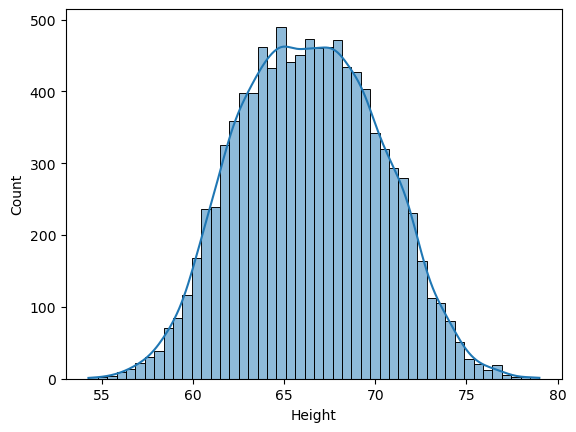

In [19]:
sns.histplot(df['Height'], kde=True)

<Axes: >

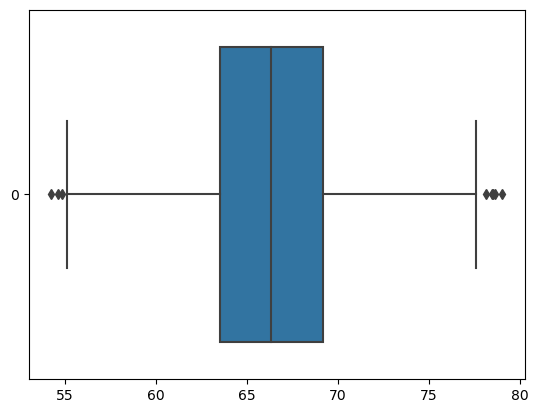

In [23]:
# box plot to see outliers
sns.boxplot(df['Height'], orient='h')
# this automatically applies the IQR method to detect outliers

In [25]:
# let's define our own upper and lower limits
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [27]:
print(upper_limit)
print(lower_limit)

74.7857900583366
58.13441158671655


### Trimming

In [30]:
# filter out the data
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [33]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

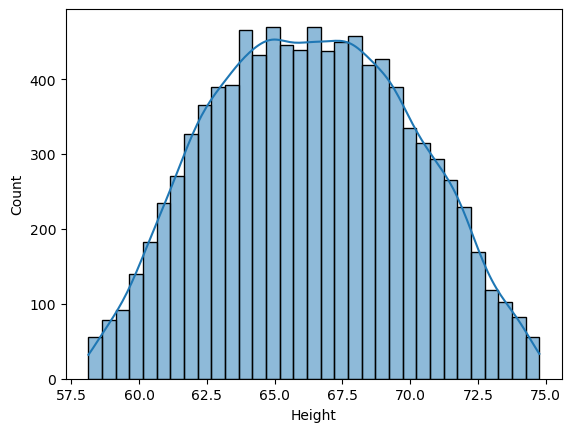

In [37]:
#plot a kdeplot
sns.histplot(new_df['Height'], kde=True)
# note that the edges have been cut off...due to our thresholds

<Axes: >

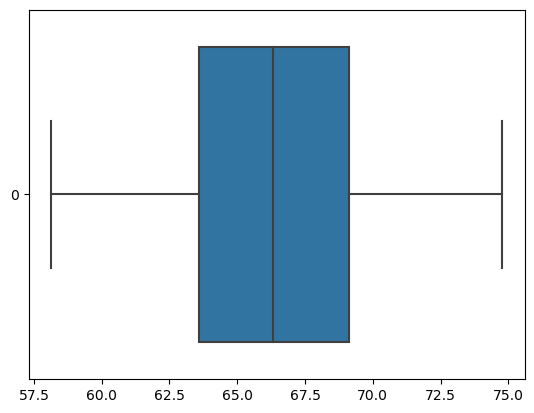

In [39]:
sns.boxplot(new_df['Height'], orient='h')
# for some reason, there are no outliers here...

### Winsorization

In [53]:
new_df_cap = df.copy()

new_df_cap['Height'] = np.where(
    df['Height'] >= upper_limit, upper_limit,
    np.where(
        df['Height'] <= lower_limit, lower_limit,
        df['Height']
        )
)

In [54]:
new_df_cap.shape

(10000, 3)

In [55]:
#plotting this again...
new_df_cap['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

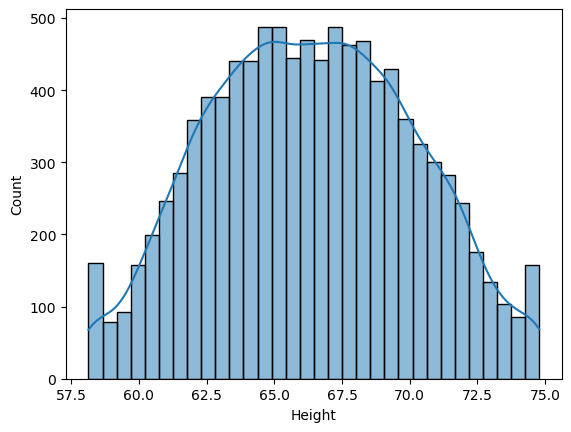

In [56]:
sns.histplot(new_df_cap['Height'], kde=True)

<Axes: >

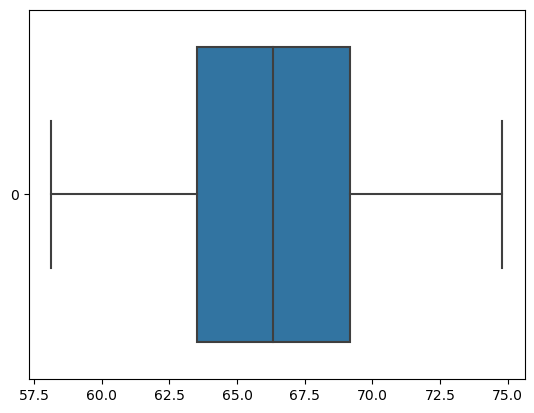

In [58]:
sns.boxplot(new_df_cap['Height'], orient='h')

As you can see, Trimmed Edges in KDE and No Outliers Boxplot...

Works damn good if you ask me...